#### BACKTESTING PORTFOLIO OF STRATEGIES 

In [1]:
import os 
import numpy as np 
import pandas as pd 

path = 'strat_returns/Testing/'

In [2]:
### FILES 
files = os.listdir(path)
#files.reverse()
print(files)
spy_idx = files.index('SPY.csv')

### COLUMNS 
cols = [ 'daily_ret', 'half_kelly']

weights = { #0.964
    'SPY' : 0.5,
    'XLU' : 0.15,
    'AMLP' : 0.087,
    'USO' : 0.087,
    'XLI' : 0.17
}

['AMLP.csv', 'IVE.csv', 'IVW.csv', 'IWM.csv', 'SPY.csv', 'XLF.csv', 'XLI.csv', 'XLU.csv', 'XLV.csv']


In [3]:
## DF 
df = pd.read_csv( path + files.pop(spy_idx), index_col= 'Unnamed: 0')
#df = df[cols]
df['ticker'] = 'SPY'
df.tail(20)

,labels,predictions,Volume,shares,net_pnl,eod_equity,daily_ret,half_kelly,ticker
2024-12-24,1,1.0,33160100.0,16175.0,0.00,2431576.66,0.000000,4.0,SPY
2024-12-26,2,1.0,41219100.0,16174.0,0.00,2431576.66,0.000000,4.0,SPY
2024-12-27,2,1.0,64969300.0,16346.0,0.00,2431576.66,0.000000,4.0,SPY
2024-12-30,2,2.0,56578800.0,16535.0,38523.55,2470100.21,0.015843,4.0,SPY
2024-12-31,2,2.0,57052700.0,16858.0,39276.14,2509376.35,0.015901,4.0,SPY
2025-01-02,0,2.0,50204000.0,17168.0,39998.44,2549374.79,0.015940,4.0,SPY
2025-01-03,1,1.0,37888500.0,17226.0,0.00,2549374.79,0.000000,4.0,SPY
2025-01-06,2,1.0,47679400.0,17128.0,0.00,2549374.79,0.000000,4.0,SPY
2025-01-07,0,1.0,60393100.0,17324.0,0.00,2549374.79,0.000000,4.0,SPY
2025-01-08,2,2.0,47304700.0,17298.0,40301.34,2589676.13,0.015808,4.0,SPY


In [4]:

for file in files: 
    
    df_file = pd.read_csv(f"strat_returns/Testing/{file}", index_col='Unnamed: 0') 
    
    #df_file = df_file[cols]
    df_file['ticker'] = file.replace('.csv', '')
    df = pd.concat([df, df_file], axis = 0 )

In [5]:
df.head()

,labels,predictions,Volume,shares,net_pnl,eod_equity,daily_ret,half_kelly,ticker
2006-01-03,1,1.0,73256700.0,244.0,0.0,10000.0,0.0,2.165,SPY
2006-01-04,1,1.0,51899600.0,243.0,0.0,10000.0,0.0,2.165,SPY
2006-01-05,2,1.0,47307500.0,243.0,0.0,10000.0,0.0,2.165,SPY
2006-01-06,1,1.0,62885900.0,241.0,0.0,10000.0,0.0,2.165,SPY
2006-01-09,2,1.0,43527400.0,444.0,0.0,10000.0,0.0,4.000,SPY


In [6]:
df = df.dropna()
df = df.reset_index()
df['index'] = pd.to_datetime(df['index'])
df = df[df['daily_ret'] != 0]

df = df.sort_values(by = ['index', 'half_kelly'], ascending=[True, False], axis = 0) 
df = df.set_index('index')
df.tail()

,labels,predictions,Volume,shares,net_pnl,eod_equity,daily_ret,half_kelly,ticker
index,,,,,,,,,
2025-01-23,2,2.0,1272700.0,33347311.0,3001254.99,1.164692e+09,0.002584,1.495,AMLP
2025-01-23,1,0.0,10792500.0,198288.0,-15866.04,1.074506e+07,-0.001474,1.450,XLU
2025-01-24,2,2.0,372100.0,3040875.0,729807.00,1.498467e+08,0.004894,4.000,IVE
2025-01-24,1,2.0,39084000.0,1343155.0,-429812.60,1.664505e+07,-0.025172,4.000,XLF
2025-01-24,2,2.0,1186100.0,37779842.0,6422570.14,1.171115e+09,0.005514,1.690,AMLP


In [7]:
### TOP HK VALUES 

import holidays
us_holidays = holidays.US()

date_range =  pd.date_range(start=df.index.min(), end=df.index.max())
date_range = [date for date in date_range if date not in us_holidays]
    

In [ ]:
traded_tickers = df.groupby(level=0)['half_kelly'].count().to_frame()
traded_tickers.columns = ['n_tickers']
traded_tickers.n_tickers.value_counts()

In [ ]:
#df.merge(traded_tickers, left_index=True, right_index = True)

In [7]:
#### FILTERING FOR HALF KELLY > 1 
df2 = df[df['half_kelly'] >= 1]
traded_tickers = df2.groupby(level=0)['half_kelly'].count().to_frame()
traded_tickers.columns = ['n_tickers']

### 1 / N PORTFOLIO 
traded_tickers['weights'] = 1 / traded_tickers['n_tickers'] 

df2 = df2.merge(traded_tickers, left_index=True, right_index = True)

df2['levered_w'] = df2['weights'] * df2['half_kelly']
df2['return'] = df2['daily_ret'] * df2['weights']
df2.tail()

,labels,predictions,Volume,shares,net_pnl,eod_equity,daily_ret,half_kelly,ticker,n_tickers,weights,levered_w,return
index,,,,,,,,,,,,,
2025-01-23,2,2.0,1272700.0,33347311.0,3001254.99,1.164692e+09,0.002584,1.495,AMLP,2,0.500000,0.747500,0.001292
2025-01-23,1,0.0,10792500.0,198288.0,-15866.04,1.074506e+07,-0.001474,1.450,XLU,2,0.500000,0.725000,-0.000737
2025-01-24,2,2.0,372100.0,3040875.0,729807.00,1.498467e+08,0.004894,4.000,IVE,3,0.333333,1.333333,0.001631
2025-01-24,1,2.0,39084000.0,1343155.0,-429812.60,1.664505e+07,-0.025172,4.000,XLF,3,0.333333,1.333333,-0.008391
2025-01-24,2,2.0,1186100.0,37779842.0,6422570.14,1.171115e+09,0.005514,1.690,AMLP,3,0.333333,0.563333,0.001838


In [8]:
df_daily = df2.groupby(level = 0)['return'].sum().to_frame()
df_daily['cum_ret'] = df_daily['return'].cumsum()
df_daily['capital'] = 6e4
df_daily['eod_capital'] = df_daily['capital'] * df_daily['cum_ret']

#df_daily = df_daily[df_daily.index <= '2016-01-01']

df_daily.head()

,return,cum_ret,capital,eod_capital
index,,,,
2002-01-08,0.019028,0.019028,60000.0,1141.680000
2002-01-09,0.019144,0.038172,60000.0,2290.303983
2002-01-10,0.000924,0.039096,60000.0,2345.766673
2002-01-11,0.019367,0.058463,60000.0,3507.791346
2002-01-14,0.018318,0.076781,60000.0,4606.856301


Text(0, 0.5, 'Cumulative Return')

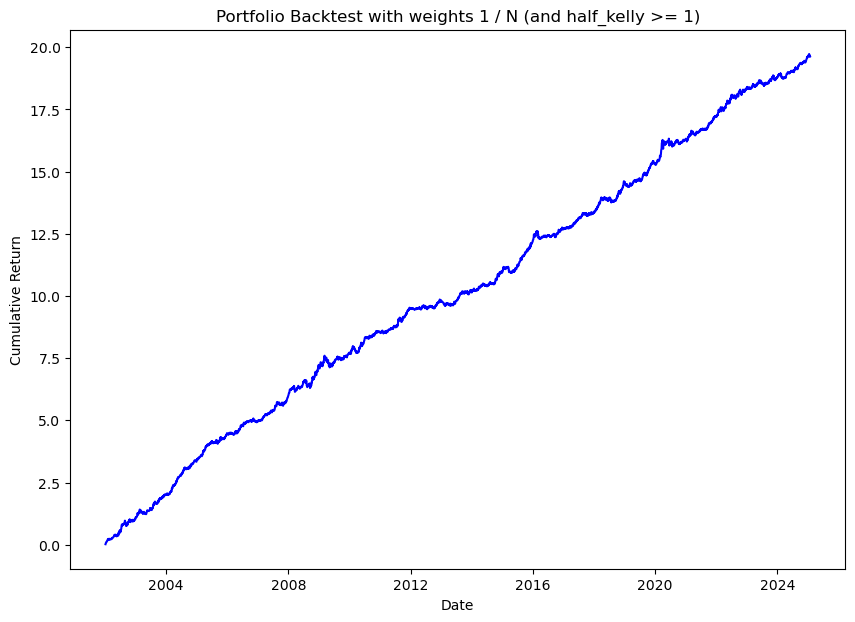

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize= [10,7])
plt.plot(df_daily.index, df_daily['cum_ret'], color = 'b')
plt.title('Portfolio Backtest with weights 1 / N (and half_kelly >= 1)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

In [10]:
#####################################################################
 # PERFORMANCE EVALUATION 
#####################################################################

#####   MAX DRAWDOWN
from calculateMaxDD import calculateMaxDD

cum_ret = np.cumprod(1+ df_daily['return']) - 1
maxDrawdown, maxDrawdownDuration, startDrawdownDay=calculateMaxDD(cum_ret.values)

#####   SHARPE RATIO
sharpe_ratio = round(np.sqrt(252) * np.mean(df_daily['return']) / np.std(df_daily['return']),2)

#####   AVG YEARLY RETURN AND STD
mean_ret = df_daily['return'].mean() * 252
std = df_daily['return'].std()*np.sqrt(252)

print(f'Sharpe Ratio: {sharpe_ratio}')
print(f'Maximum Drawdown: {round(maxDrawdown,4)}')
print(f'Max Drawdown Duration: {maxDrawdownDuration} days' )
print(f'Start day Drawdown: {startDrawdownDay}')
print(f"Average Yearly Return: {round(mean_ret*100, 2)} %")

Sharpe Ratio: 2.66
Maximum Drawdown: -0.3991
Max Drawdown Duration: 172.0 days
Start day Drawdown: 1258
Average Yearly Return: 105.7 %


Text(0, 0.5, 'HK')

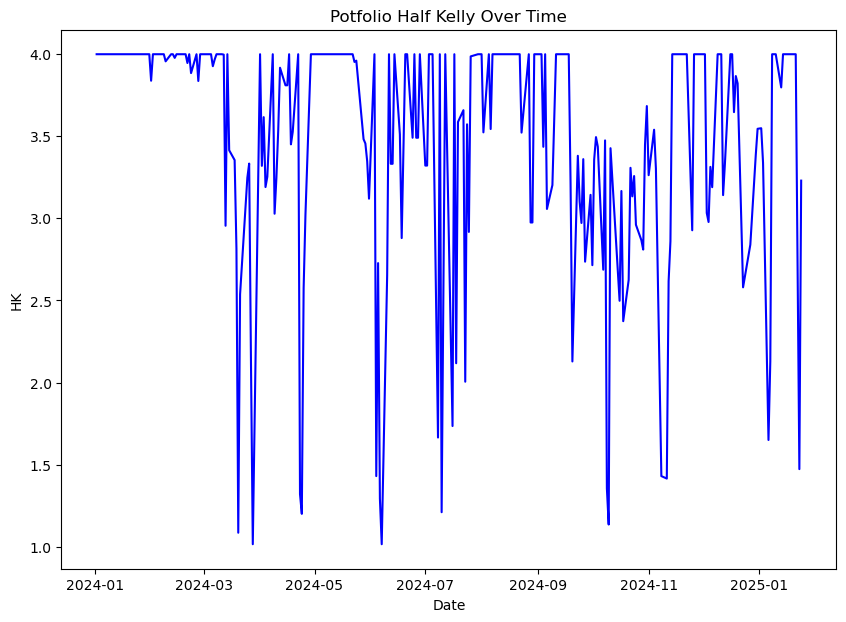

In [11]:
hk = df2.groupby(level = 0)['levered_w'].sum().to_frame()
hk = hk[hk.index >= '2024-01-02']
plt.figure(figsize=[10,7])
plt.plot(hk.index, hk['levered_w'], color = 'b')
plt.title('Potfolio Half Kelly Over Time')
plt.xlabel('Date')
plt.ylabel('HK')

In [12]:
df_daily['month'] = df_daily.index.month
df_daily.groupby('month')['return'].mean() * 30

month
1     0.154559
2     0.123245
3     0.048263
4     0.125040
5     0.116735
6     0.154874
7     0.096936
8     0.119713
9     0.081652
10    0.150710
11    0.135184
12    0.203332
Name: return, dtype: float64

### NEXT: USE THE WEIGHTS CURRENTLY IN USE!

In [14]:
### DISCRETIONARY WEIGHTS 
df2['weights'] = df2['ticker'].map(weights)
df2 = df2.dropna()

df2.head()

,labels,predictions,Volume,shares,net_pnl,eod_equity,daily_ret,half_kelly,ticker,n_tickers,weights,levered_w,return
index,,,,,,,,,,,,,
2006-01-03,0,1.0,1256500.0,1834.0,-589.88,9410.12,-0.058988,4.000,XLI,4,0.17,1.0000,-0.014747
2006-01-03,1,0.0,3912200.0,2216.0,240.76,10240.76,0.024076,3.650,XLU,4,0.15,0.9125,0.006019
2006-01-06,1,0.0,939100.0,2051.0,-208.10,10032.66,-0.020321,3.320,XLU,1,0.15,3.3200,-0.020321
2006-01-10,1,0.0,2480300.0,2348.0,-261.28,9771.38,-0.026043,3.860,XLU,2,0.15,1.9300,-0.013021
2006-01-12,2,0.0,2024000.0,2246.0,-25.46,9745.92,-0.002606,3.785,XLU,2,0.15,1.8925,-0.001303


In [15]:
df_daily = df2.groupby(level = 0)['return'].sum().to_frame()
df_daily['cum_ret'] = df_daily['return'].cumsum()
df_daily['capital'] = 6e4
df_daily['eod_capital'] = df_daily['capital'] * df_daily['cum_ret']

#df_daily = df_daily[df_daily.index <= '2016-01-01']

df_daily.head()

,return,cum_ret,capital,eod_capital
index,,,,
2006-01-03,-0.008728,-0.008728,60000.0,-523.680000
2006-01-06,-0.020321,-0.029049,60000.0,-1742.925447
2006-01-10,-0.013021,-0.042070,60000.0,-2524.213759
2006-01-12,-0.001303,-0.043373,60000.0,-2602.380814
2006-01-13,-0.004006,-0.047379,60000.0,-2842.760321


Text(0, 0.5, 'Cumulative Return')

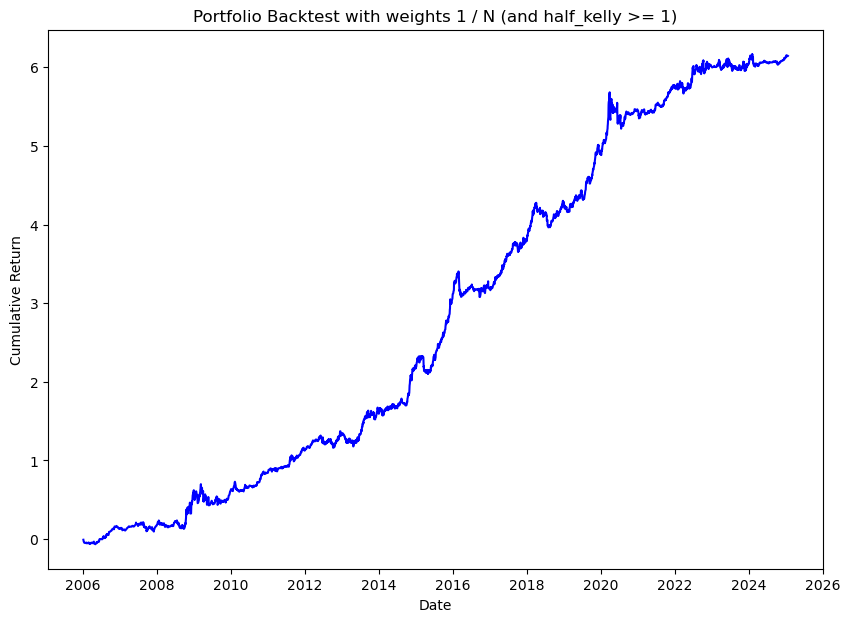

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize= [10,7])
plt.plot(df_daily.index, df_daily['cum_ret'], color = 'b')
plt.title('Portfolio Backtest with weights 1 / N (and half_kelly >= 1)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

In [17]:
#####################################################################
 # PERFORMANCE EVALUATION 
#####################################################################

#####   MAX DRAWDOWN
from calculateMaxDD import calculateMaxDD

cum_ret = np.cumprod(1+ df_daily['return']) - 1
maxDrawdown, maxDrawdownDuration, startDrawdownDay=calculateMaxDD(cum_ret.values)

#####   SHARPE RATIO
sharpe_ratio = round(np.sqrt(252) * np.mean(df_daily['return']) / np.std(df_daily['return']),2)

#####   AVG YEARLY RETURN AND STD
mean_ret = df_daily['return'].mean() * 252
std = df_daily['return'].std()*np.sqrt(252)

print(f'Sharpe Ratio: {sharpe_ratio}')
print(f'Maximum Drawdown: {round(maxDrawdown,4)}')
print(f'Max Drawdown Duration: {maxDrawdownDuration} days' )
print(f'Start day Drawdown: {startDrawdownDay}')
print(f"Average Yearly Return: {round(mean_ret*100, 2)} %")

Sharpe Ratio: 1.52
Maximum Drawdown: -0.4513
Max Drawdown Duration: 403.0 days
Start day Drawdown: 2599
Average Yearly Return: 45.14 %


Text(0, 0.5, 'HK')

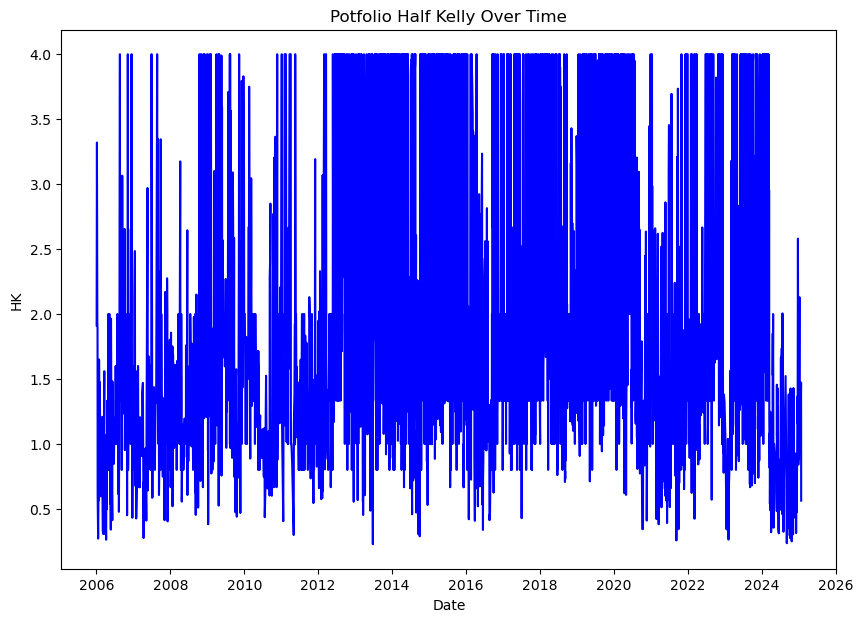

In [19]:
hk = df2.groupby(level = 0)['levered_w'].sum().to_frame()
#hk = hk[hk.index >= '2024-01-02']
plt.figure(figsize=[10,7])
plt.plot(hk.index, hk['levered_w'], color = 'b')
plt.title('Potfolio Half Kelly Over Time')
plt.xlabel('Date')
plt.ylabel('HK')

Text(0, 0.5, 'HK')

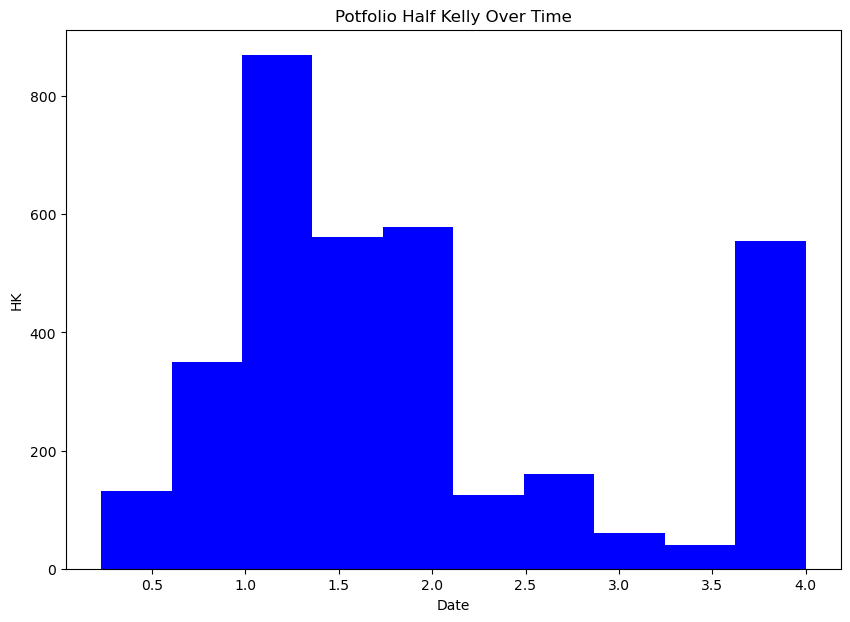

In [20]:
hk = df2.groupby(level = 0)['levered_w'].sum().to_frame()
#hk = hk[hk.index >= '2024-01-02']
plt.figure(figsize=[10,7])
#plt.plot(hk.index, hk['levered_w'], color = 'b')
plt.hist(hk['levered_w'], color = 'b')
plt.title('Potfolio Half Kelly Over Time')
plt.xlabel('Date')
plt.ylabel('HK')

In [27]:
df_daily['year'] = df_daily.index.year
df_daily.groupby('year')['return'].cumsum()

index
2006-01-03   -0.008728
2006-01-06   -0.029049
2006-01-10   -0.042070
2006-01-12   -0.043373
2006-01-13   -0.047379
                ...   
2025-01-08    0.021462
2025-01-10    0.025459
2025-01-13    0.013596
2025-01-23    0.014151
2025-01-24    0.015989
Name: return, Length: 3431, dtype: float64

In [29]:
df_daily[df_daily['year'] == 2024]['return'].sum()

0.09084729093425928